In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Year            101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital_Status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic_Attack    101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [4]:
df.isnull().sum()

Timestamp         0
Gender            0
Age               1
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

Preposesing

In [5]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [6]:
#formating data year
df['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [7]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
df["Year"] = df["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(df["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [8]:
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [9]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [10]:
# #Let's replace redundant course name with the standard course name
# df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
# df['Course'].unique()

In [11]:
df = df.drop(['Timestamp', 'Course'], axis=1)

In [12]:
df.head()

,Gender,Age,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,4,3.00 - 3.49,No,No,No,No,No


Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
#normalisasi categorical colum
label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'Year', 'CGPA', 'Marital_Status', 'Depression',	'Anxiety',	'Panic_Attack',	'Treatment']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
#normaliasi numerical column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = ['Age',]  # replace this with your actual numerical columns

for column in numerical_columns:
    df[column] = scaler.fit_transform(df[[column]])

In [15]:
df.head()

,Gender,Age,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,0.000000,0,3,0,1,0,1,0
1,1,0.500000,1,3,0,0,1,0,0
2,1,0.166667,0,3,0,1,1,1,0
3,0,0.666667,2,3,1,1,0,0,0
4,1,0.833333,3,3,0,0,0,0,0


In [16]:
# # Create a new feature that counts the total number of mental health issues each student has
# df['Mental_Health_Issues'] = df['Depression'] + df['Anxiety'] + df['Panic_Attack']

Modeling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Define feature matrix X and target vector y
X = df.drop('Treatment', axis=1)
y = df['Treatment']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 8) (80,)
Test set shape: (21, 8) (21,)


In [21]:
# svm_model = SVC(kernel='linear', C=1)
# svm_model.fit(X_train, y_train)
# y_pred = svm_model.predict(X_test)

In [22]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = model.predict(X_test)

Matrix Evaluasi

In [25]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21

Confusion Matrix:
[[19  0]
 [ 2  0]]


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

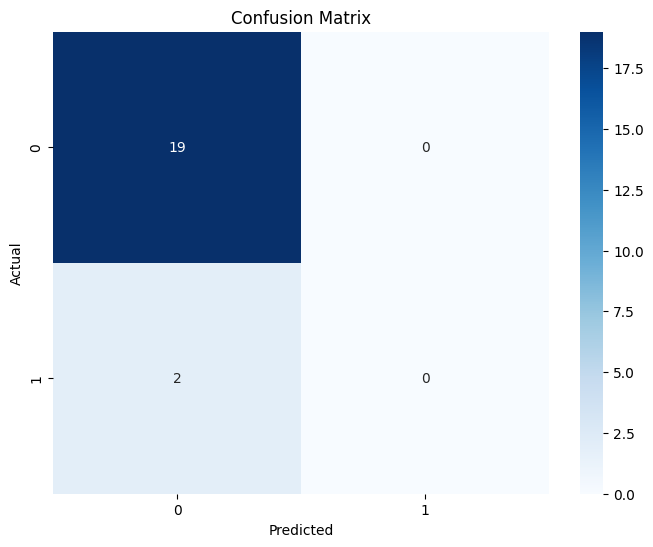

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
import pickle
filename = 'MLMentalHealth.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
